# Spotify 2023

Vamos a hacer un analizis de las mas movidas y de los generos

#### Importamos los datos

datos de https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

Description :
This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.

Key Features:
track_name: Name of the song
artist(s)_name: Name of the artist(s) of the song
artist_count: Number of artists contributing to the song
released_year: Year when the song was released
released_month: Month when the song was released
released_day: Day of the month when the song was released
in_spotify_playlists: Number of Spotify playlists the song is included in
in_spotify_charts: Presence and rank of the song on Spotify charts
streams: Total number of streams on Spotify
in_apple_playlists: Number of Apple Music playlists the song is included in
in_apple_charts: Presence and rank of the song on Apple Music charts
in_deezer_playlists: Number of Deezer playlists the song is included in
in_deezer_charts: Presence and rank of the song on Deezer charts
in_shazam_charts: Presence and rank of the song on Shazam charts
bpm: Beats per minute, a measure of song tempo
key: Key of the song
mode: Mode of the song (major or minor)
danceability_%: Percentage indicating how suitable the song is for dancing
valence_%: Positivity of the song's musical content
energy_%: Perceived energy level of the song
acousticness_%: Amount of acoustic sound in the song
instrumentalness_%: Amount of instrumental content in the song
liveness_%: Presence of live performance elements
speechiness_%: Amount of spoken words in the song


In [3]:
import numpy as np

def patch_asscalar(a):
    return a.item()

setattr(np, "asscalar", patch_asscalar)
import numpy as np
import kmapper as km
import sklearn
from sklearn import ensemble

In [4]:
import pandas as pd
df = pd.read_csv("Spotify 2023.csv", encoding='ISO-8859-1') # encoding='ISO-8859-1' is used to avoid pandas encoding error

### Conocemos nuestra db

In [5]:
df.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.) \n,"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA \n,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire \n,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer \n,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES \n,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [6]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


MAXIMO 8 ARTISTAS?!

In [7]:
n = 5  # Change this to the number of top rows you want
df.nlargest(n, 'artist_count')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
35,Los del Espacio \n,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",8,2023,6,1,1150,31,123122413,22,...,120,NaN,Major,81,63,68,11,0,11,4
642,Se Le Ve \n,"Arcangel, De La Ghetto, Justin Quiles, Lenny T...",8,2021,8,12,1560,0,223319934,72,...,84,G,Minor,56,61,76,10,0,14,11
506,We Don't Talk About Bruno \n,"Adassa, Mauro Castillo, Stephanie Beatriz, Enc...",7,2021,11,19,2785,0,432719968,95,...,206,NaN,Minor,58,83,45,36,0,11,8
667,"Cay La Noche (feat. Cruz Cafun, Abhir Hathi, B...","Quevedo, La Pantera, Juseph, Cruz Cafun, Bjo, ...",7,2022,1,14,1034,1,245400167,19,...,174,F,Minor,67,74,75,44,0,7,30
393,Jhoome Jo Pathaan \n,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6,2022,12,22,138,4,1365184,13,...,105,G,Major,82,62,74,10,0,33,7


#### Elegimos las columnas con las caracerísticas relevantes.

Conocemos nuestras columnas.

In [6]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [8]:
from sklearn.preprocessing import MinMaxScaler

df['bpm'] = MinMaxScaler(feature_range=(10, 90)).fit_transform(df[['bpm']])
df['released_year'] = MinMaxScaler(feature_range=(20, 80)).fit_transform(df[['released_year']])
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

In [10]:
print(df['mode'].unique())

['Major' 'Minor']


Cuando usan el modo menor tienden a ser tristes 

In [11]:
df = df.replace({'Major': 51, 'Minor': 49})

C:\Users\herie\AppData\Local\Temp\ipykernel_14612\1806413930.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Major': 51, 'Minor': 49})


Vemos el tipo de los datos

In [11]:
df.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year           float64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                  object
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists      object
in_deezer_charts          int64
in_shazam_charts         object
bpm                     float64
key                      object
mode                      int64
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

# Visualizar datos

Visualizamos los datos

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

if not os.path.exists('Distributions'):
    os.makedirs('Distributions')

df_sample = df.sample(100, random_state=42)

for feature in feature_names1:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_sample[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.savefig(f'Distributions/{feature}_distribution.png')

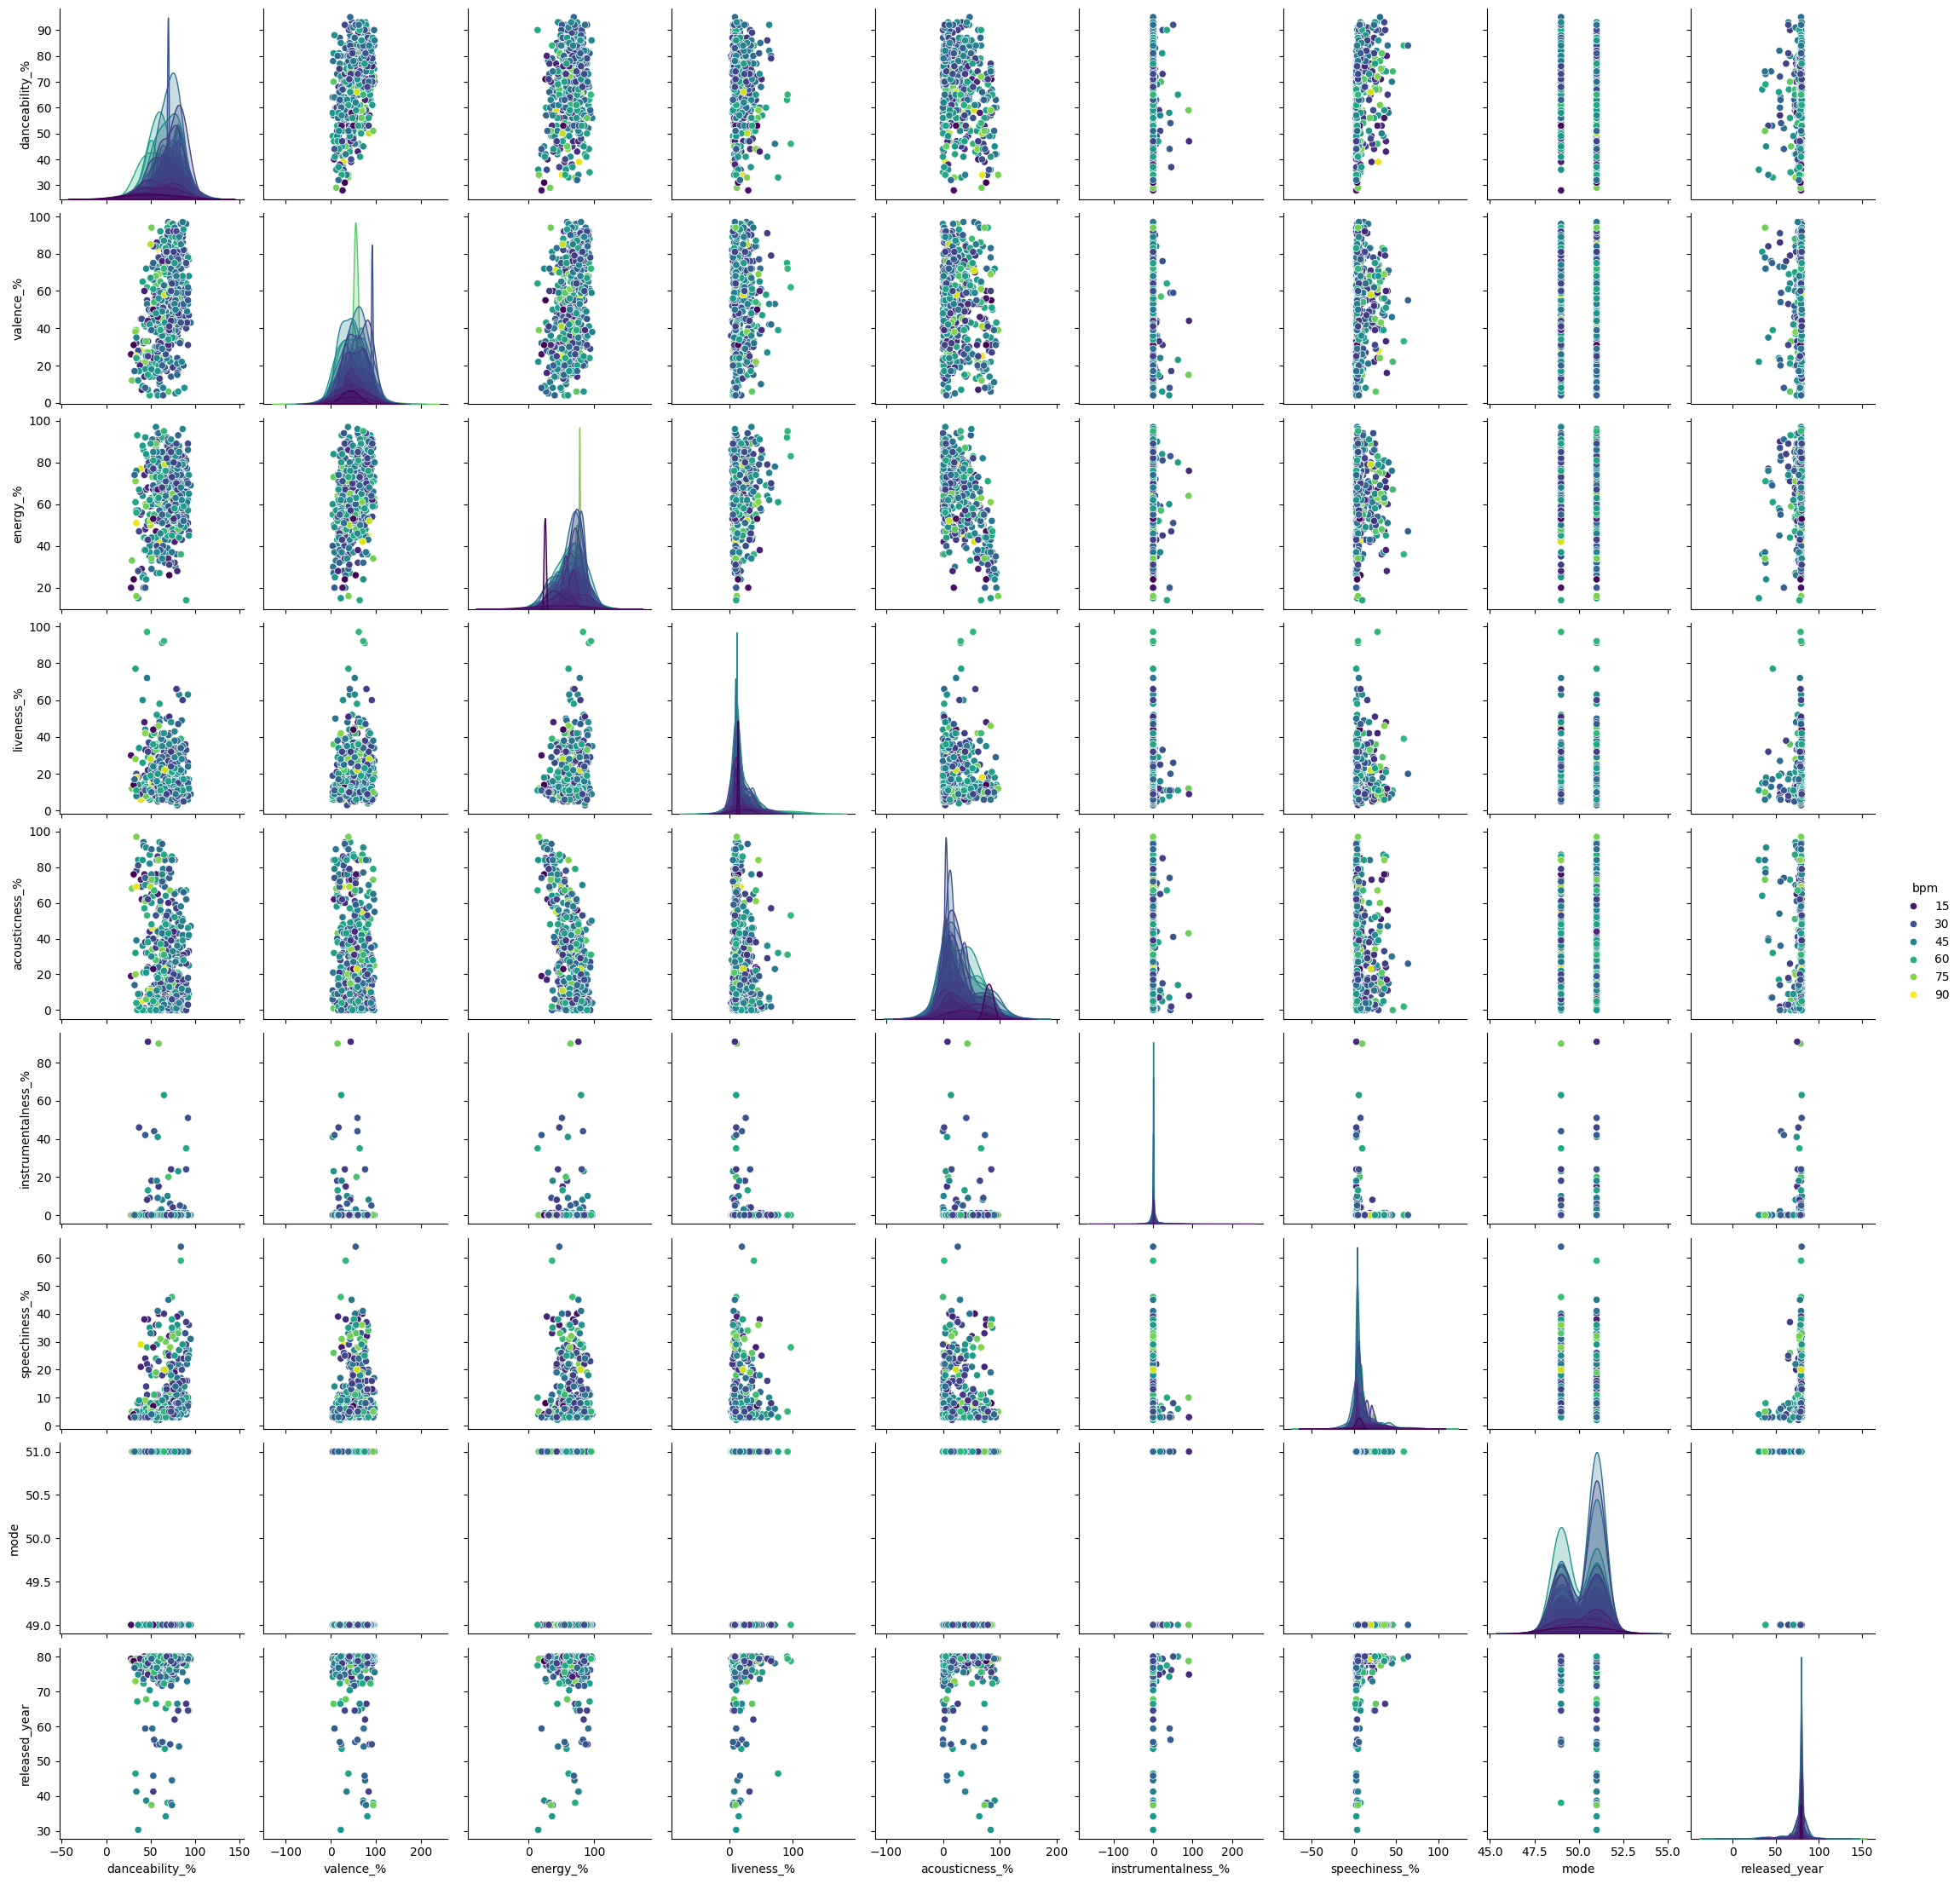

In [57]:
import seaborn as sns
import os
import matplotlib.pyplot as plt

if not os.path.exists('Pairplot'):
    os.makedirs('Pairplot')

generos = ["bpm", "danceability_%", "valence_%", "energy_%", "liveness_%",
           "acousticness_%", "instrumentalness_%", "speechiness_%", "mode", "released_year"]

n=500
pairplot = sns.pairplot(df.sample(n)[generos], hue = 'bpm', palette= 'viridis')
plt.savefig(f'Pairplot/pairplot{n}.png')

In [1]:
import numpy as np
import plotly.graph_objects as go
import plotly.io as py
import os

def create_3d_scatter(x_col, y_col, z_col):
    fig = go.Figure(data=[go.Scatter3d(
        x=df[x_col],
        y=df[y_col],
        z=df[z_col],
        mode='markers',
        marker=dict(
            size=3,
            color=df[z_col],
            colorscale='Viridis',   
            opacity=0.5
        ),
        text=df['track_name'],  # Change this to the column that contains the names of the points
        hoverinfo='text'  # Display the hover text
    )])

    title = f'{x_col}, {y_col}, {z_col}'
    fig.update_layout(
        title=title,
        scene = dict(
            xaxis = dict(title = x_col, showbackground=False),
            yaxis = dict(title = y_col,showbackground=False),
            zaxis = dict(title = z_col,showbackground=False),
        ),
        margin=dict(l=0, r=0, b=0, t=0)
    )
    
    current_dir = os.getcwd()
    subfolder = '3D Scatter plot'
    filename = os.path.join(current_dir, subfolder, title.replace(' ', '_') + '.html')
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    py.write_html(fig, filename)

    fig.show()

In [50]:
import numpy as np
import plotly.graph_objects as go
import plotly.io as py
import os

def create_3d_scatter(x_col, y_col, z_col, sphere_center=None, sphere_radius=None):
    fig = go.Figure(data=[go.Scatter3d(
        x=df[x_col],
        y=df[y_col],
        z=df[z_col],
        mode='markers',
        marker=dict(
            size=3,
            color=df[z_col],
            colorscale='Viridis',   
            opacity=0.5
        ),
        text=df['track_name'],  # Change this to the column that contains the names of the points
        hoverinfo='text'  # Display the hover text
    )])

    if sphere_center is not None and sphere_radius is not None:
        # Create a sphere
        sphere = go.Mesh3d(
            x=[sphere_center[0] + sphere_radius * np.sin(theta) * np.cos(phi) for theta in np.linspace(0, 2*np.pi, 100) for phi in np.linspace(0, np.pi, 100)],
            y=[sphere_center[1] + sphere_radius * np.sin(theta) * np.sin(phi) for theta in np.linspace(0, 2*np.pi, 100) for phi in np.linspace(0, np.pi, 100)],
            z=[sphere_center[2] + sphere_radius * np.cos(theta) for theta in np.linspace(0, 2*np.pi, 100) for phi in np.linspace(0, np.pi, 100)],
            opacity=0.01,
            color='red'
        )
        fig.add_trace(sphere)

    title = f'{x_col}, {y_col}, {z_col}'
    fig.update_layout(
        title=title,
        scene = dict(
            xaxis = dict(title = x_col, showbackground=False),
            yaxis = dict(title = y_col,showbackground=False),
            zaxis = dict(title = z_col,showbackground=False),
        ),
        margin=dict(l=0, r=0, b=0, t=0)
    )
    
    current_dir = os.getcwd()
    subfolder = '3D Scatter plot ball'
    filename = os.path.join(current_dir, subfolder, title.replace(' ', '_') + '.html')
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    py.write_html(fig, filename)

    fig.show()

Los puntos mas negativos son, personas de edad corta, que deben mucho, tienen poco salario base mensual :c y viceversa

In [ ]:
create_3d_scatter('Outstanding_Debt', 'Monthly_Inhand_Salary', 'Changed_Credit_Limit')

# Más movidas 

In [51]:
create_3d_scatter('energy_%', 'bpm', 'danceability_%', sphere_center=[75, 75, 75], sphere_radius=10)

JAJAJAJA mmm... no concuerdo mucho con estas cosas

In [14]:
masmovidas = ['energy_%', 'bpm', 'danceability_%']
MasMovidas = np.array(df[masmovidas])
TrackName = np.array(df['track_name'])

In [29]:
mapper = km.KeplerMapper(verbose=3)

KeplerMapper(verbose=3)


#### DBSCAN

In [30]:




from sklearn.decomposition import PCA
import os

#########
eps = 20
min_samples = 1
n_cubes = 20
perc_overlap = .35

lens = mapper.fit_transform(MasMovidas, projection="l2norm")


graph = mapper.map(
    lens,
    MasMovidas,
    clusterer=sklearn.cluster.DBSCAN(eps=eps, min_samples=min_samples),
    cover=km.Cover(n_cubes=n_cubes, perc_overlap=perc_overlap),
)

current_dir = os.getcwd()
subfolder = 'Más Movidas/DBSCAN'
filename = os.path.join(current_dir, subfolder, f"l2norm_eps{eps},min_samples{min_samples},n_cubes{n_cubes},perc_overlap{perc_overlap}.html")
os.makedirs(os.path.dirname(filename), exist_ok=True)
mapper.visualize(graph,
                 path_html=filename,
                 custom_tooltips=TrackName,
                 title=f"Más movidas eps{eps},min_samples{min_samples},n_cubes{n_cubes},perc_overlap{perc_overlap}")

..Composing projection pipeline of length 1:
	Projections: l2norm
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (953, 3)

..Projecting data using: l2norm

..Scaling with: MinMaxScaler()

Mapping on data shaped (953, 3) using lens shaped (953, 1)

Minimal points in hypercube before clustering: 1
Creating 20 hypercubes.
   > Found 1 clusters in hypercube 0.
   > Found 2 clusters in hypercube 1.
   > Found 1 clusters in hypercube 2.
   > Found 1 clusters in hypercube 3.
   > Found 1 clusters in hypercube 4.
   > Found 1 clusters in hypercube 5.
   > Found 1 clusters in hypercube 6.
   > Found 1 clusters in hypercube 7.
   > Found 1 clusters in hypercube 8.
   > Found 1 clusters in hypercube 9.
   > Found 1 clusters in hypercube 10.
   > Found 2 clusters in hypercube 11.
   > Found 1 clusters in hypercube 12.
   > Found 2 clusters in hypercube 13.
   > Found 2 clusters in hypercube 14.
   > Found 2 clusters in hypercube 15.
   > Found 1 clusters in hypercub

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Más movidas eps20,min_samples1,n_cubes20,perc_overlap0.35 | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\

#### K Mens

JAJHAJA quiero canciones para dormir y canciones para despertar

In [34]:
lens = mapper.fit_transform(MasMovidas)

n_clusters = 4
n_cubes = 100
perc_overlap = .35


lens = mapper.fit_transform(MasMovidas, projection="l2norm")

graph = mapper.map(
    lens,
    MasMovidas,
    clusterer=sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=11),
    cover=km.Cover(n_cubes=n_cubes, perc_overlap=perc_overlap),
)

current_dir = os.getcwd()
subfolder = 'Más Movidas/K Means'
filename = os.path.join(current_dir, subfolder, f"n_clusters{n_clusters},n_cubes{n_cubes},perc_overlap{perc_overlap}.html")
os.makedirs(os.path.dirname(filename), exist_ok=True)
mapper.visualize(graph,
                 path_html=filename,
                 custom_tooltips=TrackName,
                 title=f"n_clusters{n_clusters},n_cubes{n_cubes},n_cubes{n_cubes},perc_overlap{perc_overlap}")

..Composing projection pipeline of length 1:
	Projections: sum
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (953, 3)

..Projecting data using: sum

..Scaling with: MinMaxScaler()

..Composing projection pipeline of length 1:
	Projections: l2norm
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (953, 3)

..Projecting data using: l2norm

..Scaling with: MinMaxScaler()

Mapping on data shaped (953, 3) using lens shaped (953, 1)

Minimal points in hypercube before clustering: 4
Creating 100 hypercubes.
Cube_0 is empty.

Cube_1 is empty.

Cube_2 is empty.

Cube_3 is empty.

Cube_4 is empty.

Cube_5 is empty.

Cube_6 is empty.

Cube_7 is empty.

Cube_8 is empty.

Cube_9 is empty.

Cube_10 is empty.

Cube_11 is empty.

   > Found 4 clusters in hypercube 12.
Cube_13 is empty.

Cube_14 is empty.

Cube_15 is empty.

Cube_16 is empty.

   > Found 4 clusters in hypercube 17.
   > Found 4 clusters in hypercube 18.
   > Found 4 clusters

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>n_clusters4,n_cubes100,n_cubes100,perc_overlap0.35 | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh

In [ ]:
from sklearn.neighbors import KernelDensity
import os

eps = 15
min_samples = 5
n_cubes = 2
perc_overlap = 0.5
bandwidth = 0.9

mapper=km.KeplerMapper(verbose=1)
lens = mapper.fit_transform(Generos, projection=KernelDensity(kernel='gaussian',bandwidth=bandwidth))

graph = mapper.map(
    lens,
    Generos,
    clusterer=sklearn.cluster.DBSCAN(eps=eps, min_samples=min_samples),
    cover=km.Cover(n_cubes=n_cubes, perc_overlap=perc_overlap),
)

current_dir = os.getcwd()
subfolder = 'Géneros/Kenel Density'
filename = os.path.join(current_dir, subfolder, f"eps{eps},min_samples{min_samples},n_cubes{n_cubes},perc_overlap_{perc_overlap}, bandwidth{bandwidth}.html")
os.makedirs(os.path.dirname(filename), exist_ok=True)
mapper.visualize(graph,
                 path_html=filename,
                 custom_tooltips=TrackName,
                 title=f"eps{eps},min_samples{min_samples},n_cubes{n_cubes},perc_overlap_{perc_overlap}")

# Géneros

In [52]:
generos = ["bpm", "danceability_%", "valence_%", "energy_%", "liveness_%",
           "acousticness_%", "instrumentalness_%", "speechiness_%", "mode", "released_year"]

Generos = np.array(df[generos])
TrackName = np.array(df['track_name'])

In [36]:
print(df[generos].dtypes)

bpm                   float64
danceability_%          int64
valence_%               int64
energy_%                int64
liveness_%              int64
acousticness_%          int64
instrumentalness_%      int64
speechiness_%           int64
mode                    int64
released_year         float64
dtype: object


In [37]:
mapper = km.KeplerMapper(verbose=3)

KeplerMapper(verbose=3)


#### K Means

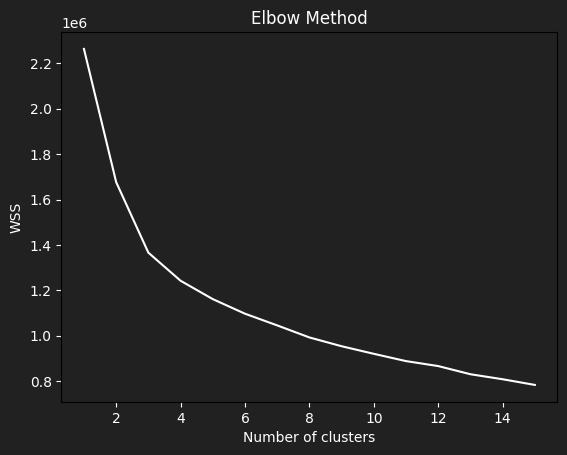

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = df[generos]

wss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wss.append(kmeans.inertia_)

plt.figure(facecolor=(33/255, 33/255, 33/255))
plt.gca().set_facecolor((33/255, 33/255, 33/255))
plt.plot(range(1, 16), wss, color='white')
plt.title('Elbow Method', color='white')
plt.xlabel('Number of clusters', color='white')
plt.ylabel('WSS', color='white')
plt.tick_params(colors='white')
plt.show()




In [60]:
import os
import numpy as np



lens = mapper.fit_transform(Generos, projection="l2norm")

n_clusters = 8
n_cubes = 50
perc_overlap = .7

graph = mapper.map(
    lens,
    Generos,
    clusterer=sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=11),
    cover=km.Cover(n_cubes=n_cubes, perc_overlap=perc_overlap),
)

current_dir = os.getcwd()
subfolder = 'Géneros/K Means'
filename = os.path.join(current_dir, subfolder, f"l2_clusters{n_clusters},n_cubes{n_cubes},perc_overlap{perc_overlap}.html")
os.makedirs(os.path.dirname(filename), exist_ok=True)
mapper.visualize(graph,
                 path_html=filename,
                 custom_tooltips=TrackName,
                 title=f"n_clusters{n_clusters},n_cubes{n_cubes},perc_overlap{perc_overlap}")

..Composing projection pipeline of length 1:
	Projections: l2norm
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (953, 10)

..Projecting data using: l2norm

..Scaling with: MinMaxScaler()

Mapping on data shaped (953, 10) using lens shaped (953, 1)

Minimal points in hypercube before clustering: 8
Creating 50 hypercubes.
Cube_0 is empty.

Cube_1 is empty.

Cube_2 is empty.

Cube_3 is empty.

Cube_4 is empty.

Cube_5 is empty.

Cube_6 is empty.

   > Found 8 clusters in hypercube 7.
   > Found 8 clusters in hypercube 8.
   > Found 8 clusters in hypercube 9.
   > Found 8 clusters in hypercube 10.
   > Found 8 clusters in hypercube 11.
   > Found 8 clusters in hypercube 12.
   > Found 8 clusters in hypercube 13.
   > Found 8 clusters in hypercube 14.
   > Found 8 clusters in hypercube 15.
   > Found 8 clusters in hypercube 16.
   > Found 8 clusters in hypercube 17.
   > Found 8 clusters in hypercube 18.
   > Found 8 clusters in hypercube 19.
   > Found 8 cl

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>n_clusters8,n_cubes50,perc_overlap0.7 | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-s

#### Kernel Density

In [ ]:
from sklearn.neighbors import KernelDensity
import os

eps = 15
min_samples = 5
n_cubes = 2
perc_overlap = 0.5
bandwidth = 0.9

mapper=km.KeplerMapper(verbose=1)
lens = mapper.fit_transform(Generos, projection=KernelDensity(kernel='gaussian',bandwidth=bandwidth))

graph = mapper.map(
    lens,
    Generos,
    clusterer=sklearn.cluster.DBSCAN(eps=eps, min_samples=min_samples),
    cover=km.Cover(n_cubes=n_cubes, perc_overlap=perc_overlap),
)

current_dir = os.getcwd()
subfolder = 'Géneros/Kenel Density'
filename = os.path.join(current_dir, subfolder, f"eps{eps},min_samples{min_samples},n_cubes{n_cubes},perc_overlap_{perc_overlap}, bandwidth{bandwidth}.html")
os.makedirs(os.path.dirname(filename), exist_ok=True)
mapper.visualize(graph,
                 path_html=filename,
                 custom_tooltips=TrackName,
                 title=f"eps{eps},min_samples{min_samples},n_cubes{n_cubes},perc_overlap_{perc_overlap}")